# HDBSCAN
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
df = pd.read_csv('../../dataset/CLUSTERING ALGORITHMS (UNLABELLED DATA)/Wholesale customers data.csv')
X = df.iloc[:, 2:].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

print(f'Data shape: {X_scaled.shape}')

Data shape: (440, 6)


In [3]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
labels = hdbscan_model.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')
if n_clusters > 1:
    print(f'Silhouette Score: {silhouette_score(X_scaled, labels):.4f}')

Number of clusters: 2
Number of noise points: 339
Silhouette Score: -0.1557


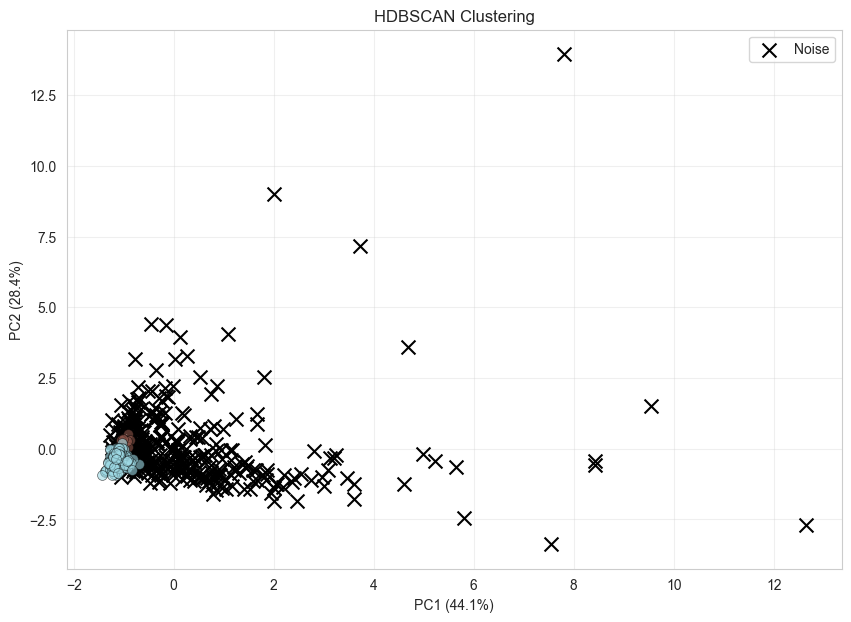

In [4]:
plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(sorted(unique_labels), colors):
    if label == -1:
        color = 'black'
    mask = labels == label
    if label == -1:
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=[color], marker='x', s=100, label='Noise')
    else:
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=[color], s=50, alpha=0.6, edgecolors='black', linewidth=0.5)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('HDBSCAN Clustering')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()